<a href="https://colab.research.google.com/github/ly5977507/CNN-pizza_steak/blob/main/cnn(pizza_steak).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/CNN(pizza_steak)/pizza_steak"

for dirpath, dirnames, filenames in os.walk(path):
    print(f"there are {len(dirnames)} directores and {len(filenames)} images in '{dirpath}'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
there are 2 directores and 0 images in '/content/drive/MyDrive/Colab Notebooks/CNN(pizza_steak)/pizza_steak'
there are 2 directores and 0 images in '/content/drive/MyDrive/Colab Notebooks/CNN(pizza_steak)/pizza_steak/test'
there are 0 directores and 250 images in '/content/drive/MyDrive/Colab Notebooks/CNN(pizza_steak)/pizza_steak/test/pizza'
there are 0 directores and 250 images in '/content/drive/MyDrive/Colab Notebooks/CNN(pizza_steak)/pizza_steak/test/steak'
there are 2 directores and 0 images in '/content/drive/MyDrive/Colab Notebooks/CNN(pizza_steak)/pizza_steak/train'
there are 0 directores and 750 images in '/content/drive/MyDrive/Colab Notebooks/CNN(pizza_steak)/pizza_steak/train/steak'
there are 0 directores and 750 images in '/content/drive/MyDrive/Colab Notebooks/CNN(pizza_steak)/pizza_steak/train/pizza'


In [19]:
import pathlib
import numpy as np

data_dir = pathlib.Path(path+"/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_img = random.sample(os.listdir(target_folder), 1)
    img = mping.imread(target_folder + '/' + random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 384, 3)


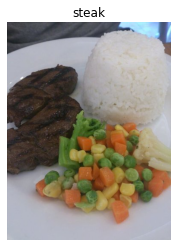

In [21]:
img = view_random_image(path+"/train/", "steak")

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_dir = path+"/train/"
test_dir = path+"/test/"
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 287s 6s/step - loss: 0.5655 - accuracy: 0.7180 - val_loss: 0.4210 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 12s 254ms/step - loss: 0.4337 - accuracy: 0.8120 - val_loss: 0.3306 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 12s 254ms/step - loss: 0.3976 - accuracy: 0.8253 - val_loss: 0.3797 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 12s 255ms/step - loss: 0.3850 - accuracy: 0.8367 - val_loss: 0.3264 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 12s 255ms/step - loss: 0.3414 - accuracy: 0.8547 - val_loss: 0.3252 - val_accuracy: 0.8740


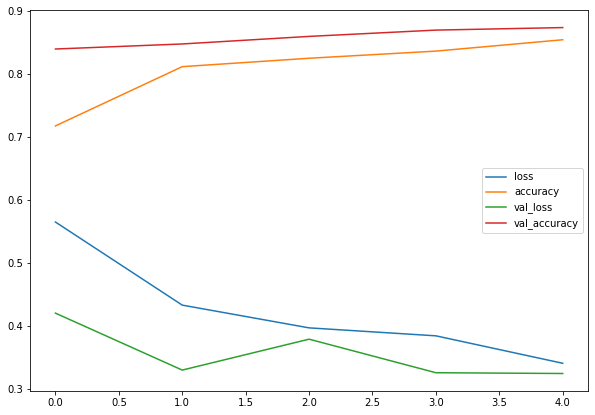

In [23]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [25]:
def load_and_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    img = img/255.
    return img 

(-0.5, 223.5, 223.5, -0.5)

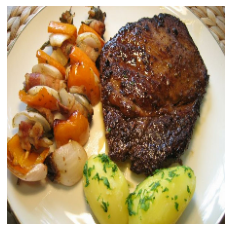

In [26]:
filename = "/content/drive/MyDrive/Colab Notebooks/CNN(pizza_steak)/steak.jpg"
steak = load_and_image(filename)
plt.imshow(steak)
plt.axis("off")

In [27]:
def pred_and_plot(model, filename, class_names):
    img = load_and_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pre_class = class_names[int(tf.round(pred)[0][0])]

    plt.imshow(img)
    plt.title(f"Prediction: {pre_class}")
    plt.axis(False)

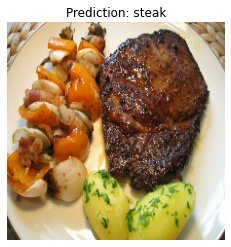

In [28]:
pred_and_plot(model_1, filename, class_names)